In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Fuel_Consumption_Ratings.csv')
df = pd.DataFrame(data)

In [138]:
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


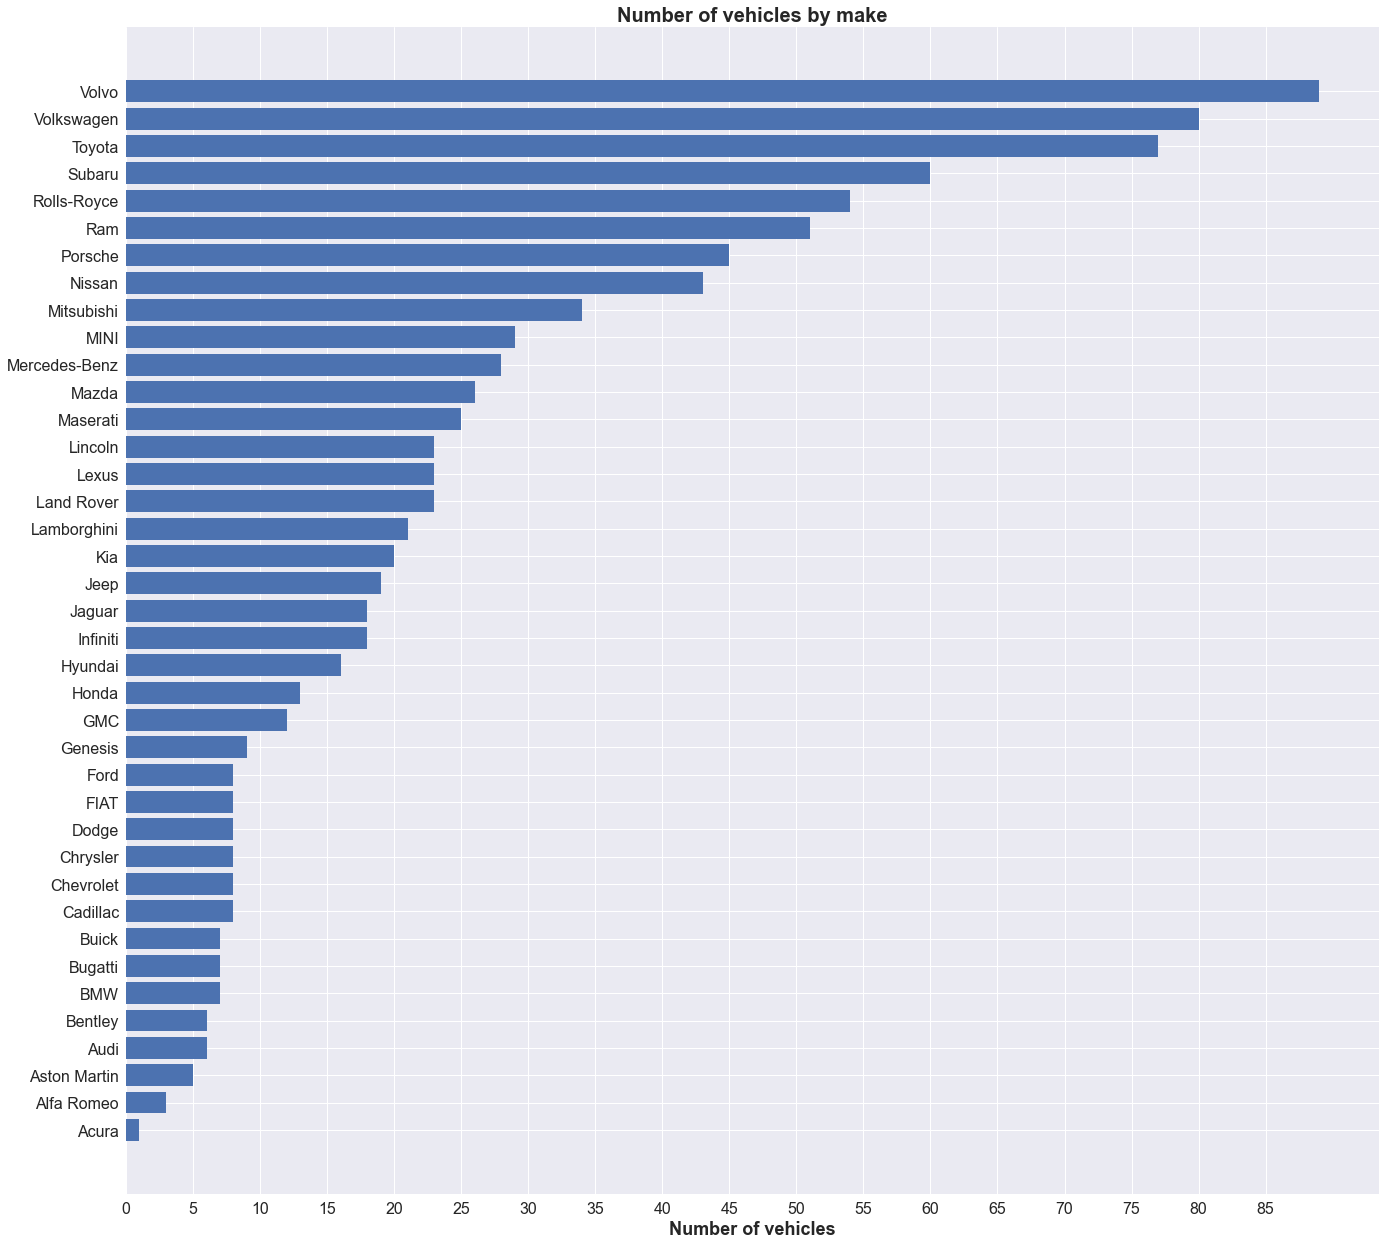

In [39]:
# Most vehicles by make
x = pd.unique(df['Make'])
y = df['Make'].value_counts()
y.sort_values(inplace=True)
x_ticks = np.arange(0,90,5)

plt.style.use('seaborn')
plt.figure(figsize=(20,20))

plt.title('Number of vehicles by make', fontweight='bold', fontsize=20)
plt.xlabel('Number of vehicles', fontweight='bold', fontsize=18)
plt.xticks(ticks=x_ticks, fontsize=16)
plt.yticks(fontsize=16)

plt.barh(x,y)
plt.show()

In [109]:
make_grp = df.groupby(by='Cylinders').median()

city_consumption_df = pd.DataFrame(make_grp['Fuel Consumption (City (L/100 km)'])
city_consumption_df.reset_index(inplace=True)

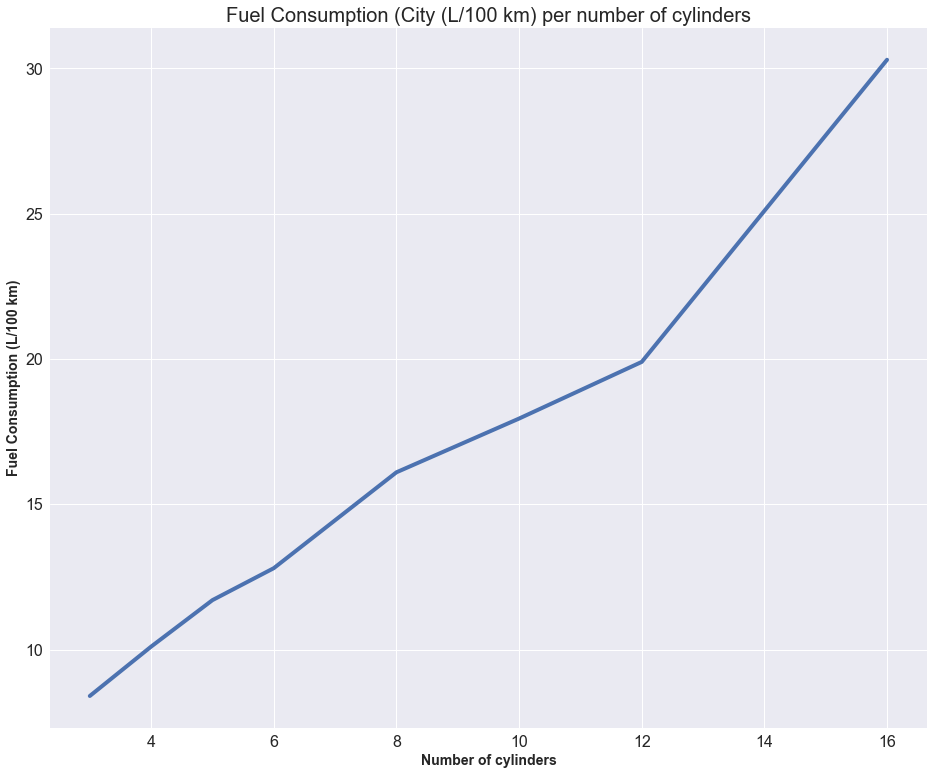

In [141]:
x = city_consumption_df['Cylinders']
y = city_consumption_df['Fuel Consumption (City (L/100 km)']

plt.style.use('seaborn')
plt.figure(figsize=(14,12))
plt.title('Fuel Consumption (City (L/100 km) per number of cylinders', fontsize=20)
plt.xlabel('Number of cylinders', fontweight='bold', fontsize=14)
plt.ylabel('Fuel Consumption (L/100 km)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(x,y, linewidth=4)

In [139]:
filt = df['Cylinders'] == 16
df[filt]

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
132,2022,Bugatti,Chiron,Two-seater,8.0,16,AM7,Z,26.8,16.6,22.2,13,522,1,1
133,2022,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608,1,1
134,2022,Bugatti,Chiron Super Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608,1,1


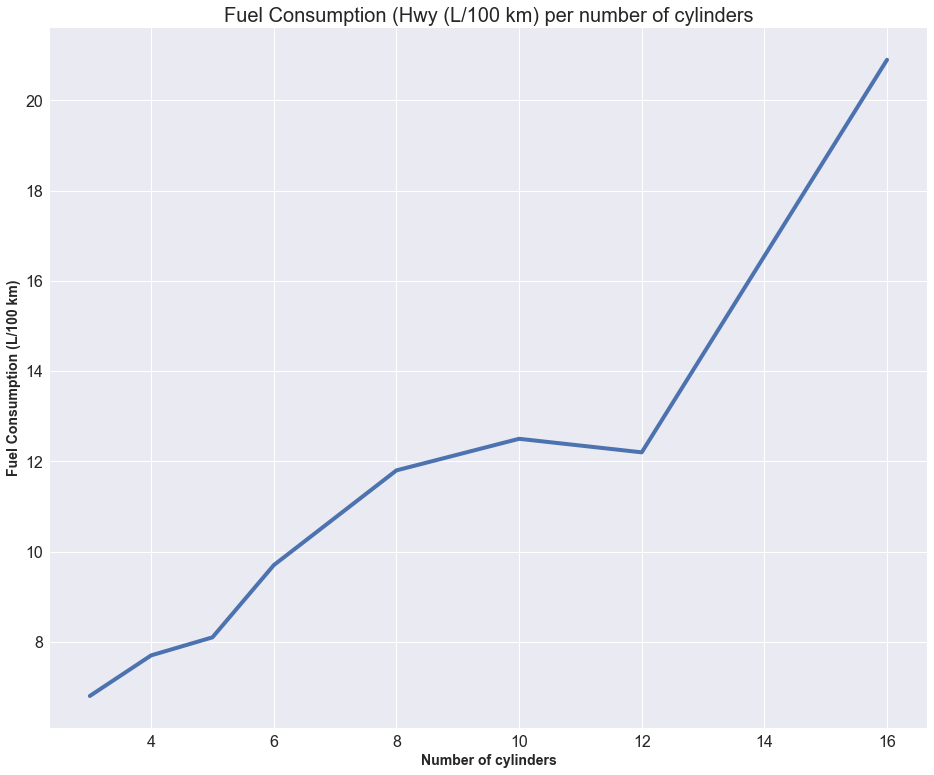

In [148]:
hgw_consumption = make_grp['Fuel Consumption(Hwy (L/100 km))'].reset_index()
x = hgw_consumption['Cylinders']
y = hgw_consumption['Fuel Consumption(Hwy (L/100 km))']

plt.style.use('seaborn')
plt.figure(figsize=(14,12))
plt.title('Fuel Consumption (Hwy (L/100 km) per number of cylinders', fontsize=20)
plt.xlabel('Number of cylinders', fontweight='bold', fontsize=14)
plt.ylabel('Fuel Consumption (L/100 km)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(x,y, linewidth=4)

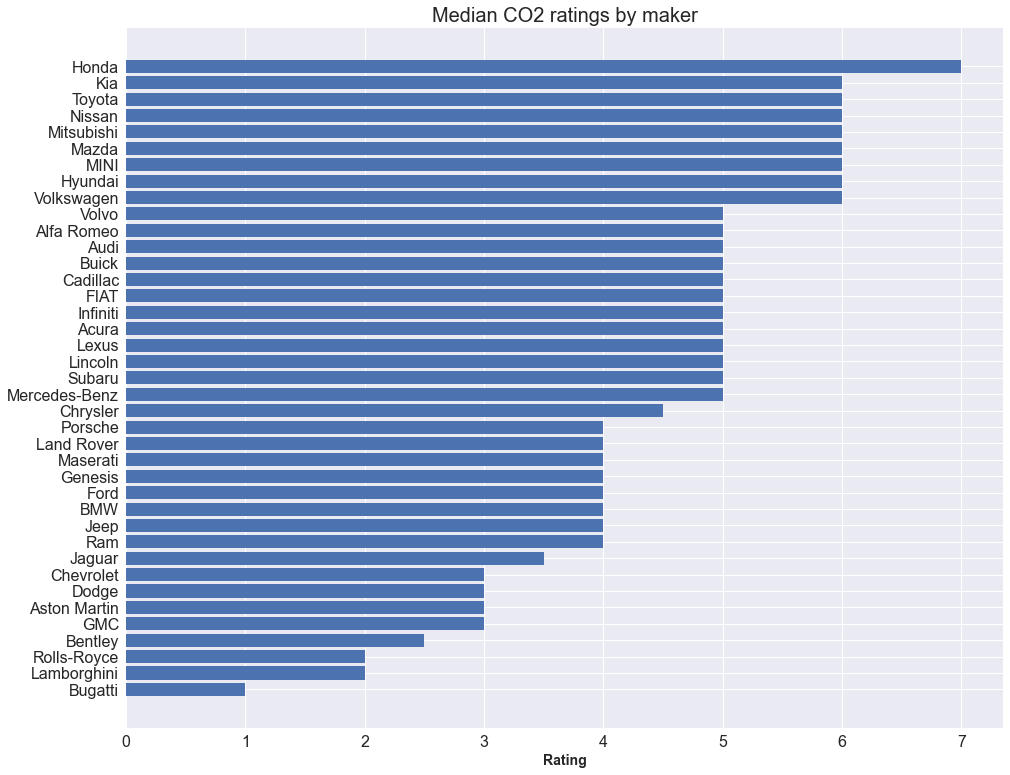

In [161]:
make_cons_grp = df.groupby(by='Make').median().sort_values('CO2 Rating').reset_index()
x = make_cons_grp['Make']
y = make_cons_grp['CO2 Rating']
plt.style.use('seaborn')
plt.figure(figsize=(14,12))
plt.title('Median CO2 ratings by maker', fontsize=20)
plt.xlabel('Rating', fontweight='bold', fontsize=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.barh(x,y, linewidth=4)
plt.show()

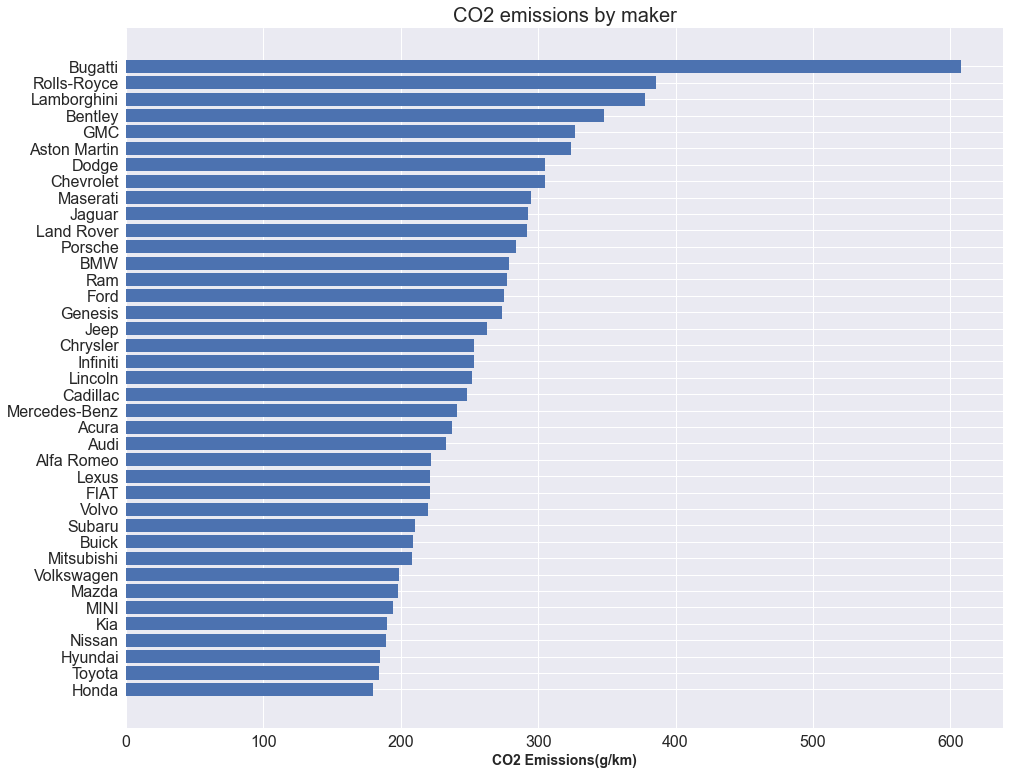

In [170]:
make_emission_grp = df.groupby(by='Make').median().sort_values('CO2 Emissions(g/km)').reset_index()
x = make_emission_grp['Make']
y = make_emission_grp['CO2 Emissions(g/km)']
plt.style.use('seaborn')
plt.figure(figsize=(14,12))
plt.title('CO2 emissions by maker', fontsize=20)
plt.xlabel('CO2 Emissions(g/km)', fontweight='bold', fontsize=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.barh(x,y, linewidth=4)
plt.show()

In [168]:
df.groupby(by='Make').median().sort_values('CO2 Emissions(g/km)')

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Make,,,,,,,,,,
Honda,2022.0,2.00,4.0,8.50,6.80,7.70,37.0,180.0,7.0,6.0
Toyota,2022.0,2.50,4.0,8.70,6.90,7.90,36.0,184.0,6.0,6.0
Hyundai,2022.0,2.00,4.0,8.80,7.10,7.80,36.0,185.0,6.0,5.0
Nissan,2022.0,2.00,4.0,9.10,6.80,8.10,35.0,189.0,6.0,6.0
Kia,2022.0,2.00,4.0,8.80,7.00,8.00,35.0,190.0,6.0,5.0
MINI,2022.0,2.00,4.0,9.45,7.00,8.35,33.5,194.5,6.0,7.0
Mazda,2022.0,2.50,4.0,9.40,7.20,8.40,34.0,198.0,6.0,6.0
Volkswagen,2022.0,2.00,4.0,9.75,7.20,8.50,33.0,199.0,6.0,7.0
Mitsubishi,2022.0,2.00,4.0,9.70,7.90,8.90,32.0,208.0,6.0,5.0
